In [106]:
!pip install PyWavelets

In [107]:
def reconstruct_component(coeffs, index, wavelet):
    new_coeffs = [np.zeros_like(c) if i != index else c for i, c in enumerate(coeffs)]
    return pywt.waverec(new_coeffs, wavelet)

In [108]:
import pywt
import numpy as np


In [109]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import pywt
from scipy.signal import savgol_filter, welch
import matplotlib.pyplot as plt

from scipy.io import loadmat

# Path to the .mat file
mat_file_path = '/content/drive/MyDrive/sl01t01_walking.mat'

# Load the .mat file
mat_data = loadmat(mat_file_path)

# Access variables
print(mat_data.keys())  # To see all variables in the file
x1 = mat_data['x1']     # Replace 'x1' with the actual variable name

dict_keys(['__header__', '__version__', '__globals__', 'x1'])


In [111]:
x1=x1.flatten()

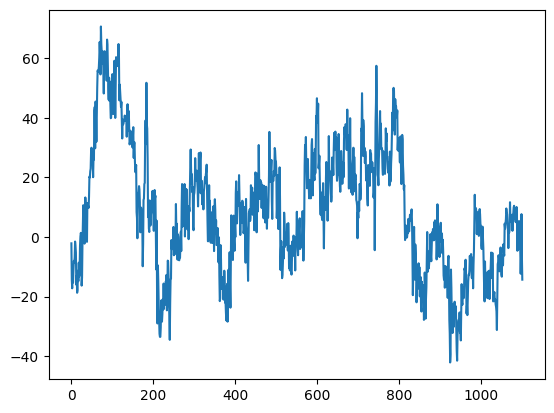

In [112]:
plt.plot(x1)

In [113]:
fs = 100  # Sampling frequency
x1 = x1 - np.mean(x1)  # Remove mean
x1 = x1 / np.max(np.abs(x1))  # Normalize

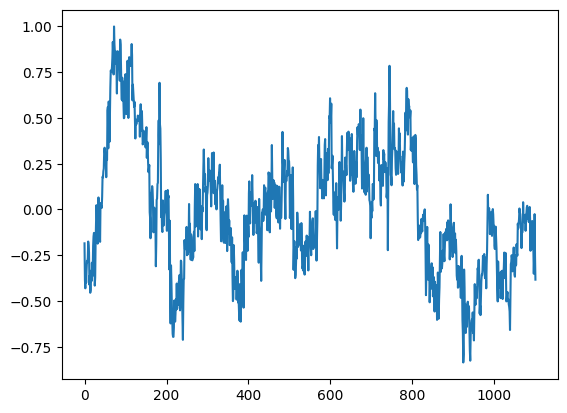

In [114]:
plt.plot(x1)

In [115]:
wavelet = 'db4'
coeffs = pywt.wavedec(x1, wavelet, level=5)  # Decomposed coefficients

# Extract Approximation and Detail Coefficients
A5, D5, D4, D3, D2, D1 = coeffs  # Unpacks coefficients directly

# Function to reconstruct each component properly
def reconstruct_component(coeffs, index, wavelet):
    new_coeffs = [np.zeros_like(c) if i != index else c for i, c in enumerate(coeffs)]
    return pywt.waverec(new_coeffs, wavelet)

# Reconstruct Approximation and Each Detail
xa = reconstruct_component(coeffs, 0, wavelet)  # Approximation A5
xd5 = reconstruct_component(coeffs, 1, wavelet)  # Detail D5
xd4 = reconstruct_component(coeffs, 2, wavelet)  # Detail D4
xd3 = reconstruct_component(coeffs, 3, wavelet)  # Detail D3
xd2 = reconstruct_component(coeffs, 4, wavelet)  # Detail D2
xd1 = reconstruct_component(coeffs, 5, wavelet)  # Detail D1
xa=xa[:len(x1)]
xd1=xd1[:len(x1)]
xd2=xd2[:len(x1)]
xd3=xd3[:len(x1)]
xd4=xd4[:len(x1)]
xd5=xd5[:len(x1)]

In [116]:
xd5.shape

(1101,)

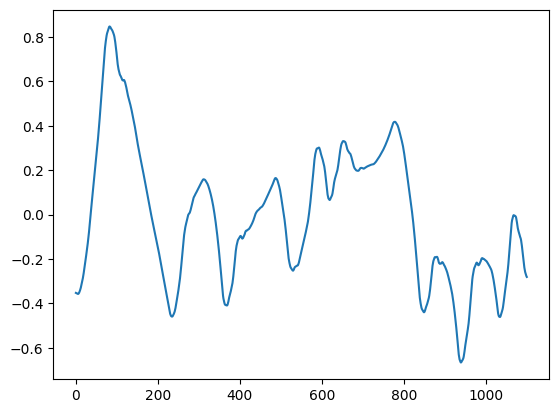

In [117]:
plt.plot(xa)

In [118]:
xaf = savgol_filter(xa, window_length=301, polyorder=3)

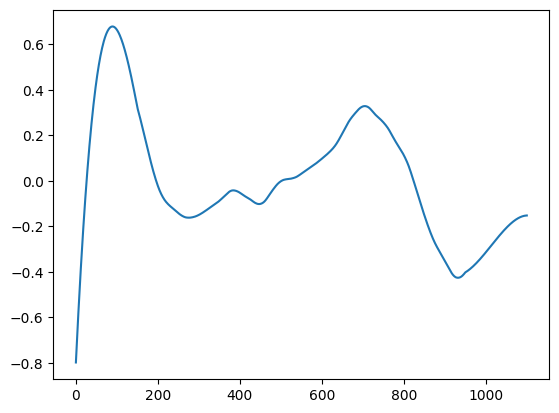

In [119]:
plt.plot(xaf)

In [120]:
xf=xa-xaf

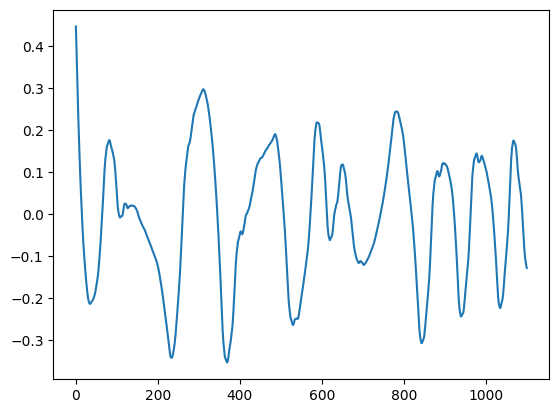

In [121]:
plt.plot(xf)

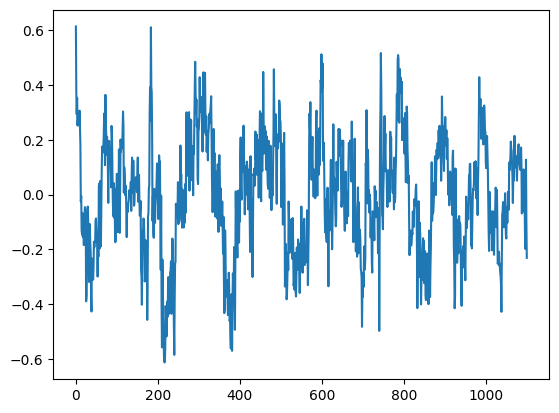

In [122]:
plt.plot(xf+xd5+xd4+xd3+xd2+xd1)